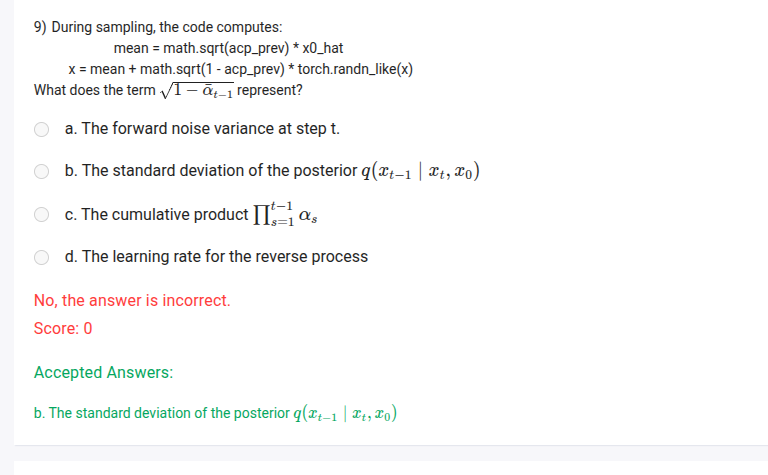

x0_hat -> estimate of the original image
acp_prev -> it is the 

alpha_hat_t-1 => acp_prev =>(the cumulative product of α values up to time step t-1)


Let's break down the question and the correct answer in detail.

---

### 🧠 **Background: Diffusion Models**

Diffusion models work by:

1. **Forward process (`q(x_t | x_{t-1})`)**: Gradually adding noise to data over time steps.
2. **Reverse process (`p(x_{t-1} | x_t)`)**: Learning to denoise and sample data by reversing the forward process.

During **sampling** in the reverse process, we try to reconstruct `x_{t-1}` from `x_t` using an estimate of the original image `x0_hat`.

---

### 📌 **Given: Sampling Code**

```python
mean = math.sqrt(acp_prev) * x0_hat
x = mean + math.sqrt(1 - acp_prev) * torch.randn_like(x)
```

Where:

* `acp_prev` = `ᾱ_{t-1}` (the cumulative product of `α` values up to time step `t-1`)
* `x0_hat` is the estimate of the original image `x₀`
* `torch.randn_like(x)` is Gaussian noise

---

### 🧮 **Expression: 1 - ᾱ\_{t-1}**

This expression is:

$$
1 - \bar{\alpha}_{t-1}
$$

It is **not** the cumulative product itself, but rather the **complement** of the cumulative product of the forward noise.

Now let’s understand **what it represents** in the context of the reverse process.

---

### ✅ **Correct Answer: (b)**

> **b. The standard deviation of the posterior**
> $q(x_{t-1} \mid x_t, x_0)$

Let’s understand why:

---

### 🔍 **Posterior Distribution in DDPM**

The **true posterior** of the forward process is:

$$
q(x_{t-1} | x_t, x_0) = \mathcal{N}(\mu_t(x_t, x_0), \Sigma_t)
$$

This is a **Gaussian distribution**, where:

* `μ_t(x_t, x0)` is the **mean**
* `Σ_t` is the **variance (or standard deviation squared)**

The **variance of this posterior** is derived as:

$$
\text{Var}[q(x_{t-1} | x_t, x_0)] = \frac{(1 - \bar{\alpha}_{t-1})}{(1 - \bar{\alpha}_t)} \cdot \beta_t
$$

But if you simplify the **sampling noise term**, it comes out to a **standard deviation** involving:

$$
\sqrt{1 - \bar{\alpha}_{t-1}}
$$

That’s what we see in the code:

```python
torch.randn_like(x) * math.sqrt(1 - acp_prev)
```

Hence, this is the **standard deviation (σ)** of the posterior used for sampling from `q(x_{t-1} | x_t, x0)`.

---

### ❌ **Why the Other Options Are Incorrect**

| Option                                            | Explanation                                                                       |
| ------------------------------------------------- | --------------------------------------------------------------------------------- |
| **a. The forward noise variance at step t**       | Wrong — this would be `β_t`, not `1 - ᾱ_{t-1}`.                                  |
| **c. The cumulative product ∏\_{s=1}^{t-1} α\_s** | This is `ᾱ_{t-1}`, not `1 - ᾱ_{t-1}`.                                           |
| **d. The learning rate for the reverse process**  | There’s no such thing as a learning rate here — this is not an optimization loop. |

---

### 📘 **Summary**

* In DDPM sampling, the posterior distribution $q(x_{t-1} | x_t, x_0)$ is **Gaussian**.
* The noise added during sampling is scaled by the **standard deviation** of this Gaussian.
* The term $\sqrt{1 - \bar{\alpha}_{t-1}}$ appears in the **noise** and is used to sample correctly from the posterior.
* So, it correctly represents the **standard deviation of the posterior**, **not** the variance of the forward process or the cumulative product itself.

---

